In [79]:
import numpy as np
import matplotlib.pyplot as plt

### Q1

In [81]:
np.random.seed(42)
alpha = 1

# target density p
p = 1 / np.sqrt(2*np.pi) * np.exp(-x**2 / 2)

# constant M 
M = np.sqrt(2*np.e / np.pi)

# proposal q
q = (alpha / 2) * np.exp(-alpha * np.abs(x))

n = 100000
s = np.array([])  # note when setting the variable names

# define the acceptance prob
def a_p(x):
    return (1/np.sqrt(2*np.pi)*np.exp(-x**2/2)) / (M*(alpha/2)*np.exp(-alpha*np.abs(x)))

# sampling
for i in range(n):
    x = np.random.laplace(0, 1/alpha)
    thresh = a_p(x)
    u = np.random.uniform(0, 1)
    if u <= thresh:
        s = np.append(s, x)


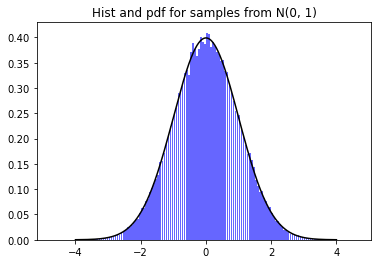

In [82]:
# hist
plt.hist(s, bins=150, density=True, rwidth=0.8, color='b', alpha=0.6)

# density
xr = np.linspace(-4, 4, 1000)
y = 1 / np.sqrt(2*np.pi) * np.exp(-xr**2 / 2)
plt.plot(xr, y, "k-")

plt.title("Hist and pdf for samples from N(0, 1)")
plt.show()

In [83]:
# emperical acceptance rate
ar = len(s) / n
print(ar)

# ALT: set acc and +=1 each time s is augmented
# acceptance rate for the original exercise: 0.76
print(1/M)

# quite CLOSE!

0.76066
0.7601734505331403


### Q2

In [99]:
m = np.array([2, -2])
w = np.array([0.8, 0.2])
s = np.array([0.2, 0.2])
a = np.array([0.5, 0.5])
p = [0, 1]  # unnecessary

csw = np.cumsum(w)

# return the index
def discrete_sampler(w):
    u = np.random.uniform(0, 1)
    for i in range(len(csw)):
        if csw[i] > u:
            sw = i
            break
    return sw


In [102]:
# rejection sampler
def rej_samp(mu, sigma, a, n):
    q = -1
    while q == -1:
        x = np.random.normal(mu, sigma, 1) # from the q
        if mu - a <= x <= mu + a:
            q = -q
    return x


# if, simply just sample from a truncated distri, similar imple from Ex2.1

samples = np.array([])
n = 10000

def trunc_sampler(mu, sigma, a, n):
    while len(samples) < n :
        x = np.random.normal(mu, sigma, 1)
        if mu - a <= x <= mu + a:
            samples = np.append(samples, x)
    return samples


In [105]:
splis = np.array([])
N = 100000

for i in range(N):
    sw = discrete_sampler(w)
    sample = rej_samp(m[sw], s[sw], a[sw], n=1)
    splis = np.append(splis, sample)

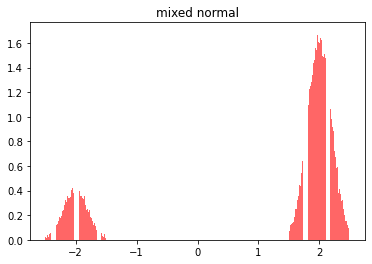

In [106]:
# plotting

plt.hist(splis, bins=900, density=True, color='r', rwidth=0.8, alpha=0.6)
plt.title("mixed normal")
plt.show()

### Q2 Sol

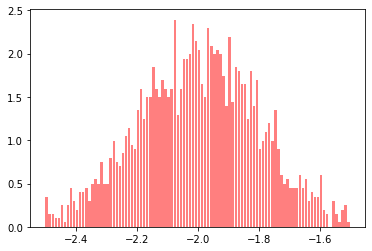

In [97]:
import numpy as np
import matplotlib.pyplot as plt

w_1 = 0.8
w_2 = 0.2

mu_1 = 2
mu_2 = -2

sigma_1 = 0.2
sigma_2 = 0.2

a_1 = 0.5
a_2 = 0.5

w = np.array([w_1 , w_2])


def sample_discrete (w): # draws a single index (0,... ,K-1) from a discrete distribution with probabilities w where K is length of CDF
    cw = np.cumsum(w)
    sample = []

    u = np.random.uniform(0, 1)

    for k in range(len(cw)):
        if cw[k] > u:
            sample = k
        break

    return sample


def sample_truncated_gauss (mu , sigma , a, n):
    x_samples = np.array([])

    while len( x_samples ) < n: # keep sampling until we have n samples
        x_prop = np.random.normal(mu , sigma , 1) # sample from the proposal distribution
        if mu - a < x_prop < mu + a: # check if the sample is in the support of the truncated Gaussian
             x_samples = np.append(x_samples , x_prop) # if it is, add it to the array of samples

    return x_samples


N = 10000

x_samples = np.array([])

# mixture sampling below (can be made a function)

for i in range(N):
    samp = sample_discrete (w) # sample an index from the discrete distribution

    if samp == 0: # if the index is 0, sample from the first truncated Gaussian
        x = sample_truncated_gauss (mu_1 , sigma_1 , a_1 , 1)
    else: # if the index is 1, sample from the second truncated Gaussian
        x = sample_truncated_gauss (mu_2 , sigma_2 , a_2 , 1)

        x_samples = np.append(x_samples , x) # add the sample to the array of samples

plt.hist(x_samples , bins=100 , density=True , rwidth=0.8, color='r', alpha=0.5)
plt.show ()

### Q3

In [ ]:
# marginal of x:
p = 2 * np.sqrt(1 - x**2) / np.pi # on [-1, 1]

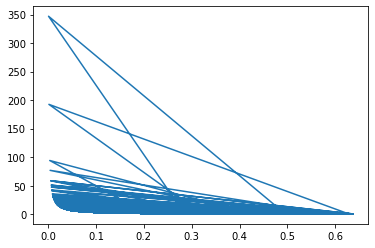

In [78]:
# simply plot n' plot the marginal over it

n = 100000
x = np.random.uniform(-1, 1, n)
tx = 2 * np.sqrt(1 - x**2) / np.pi
y = 1 / (np.pi * tx)

plt.plot(tx, y)
plt.show()

### Q3 sol: sample uniformly within a circle and plot just x1 in comparison with its hist

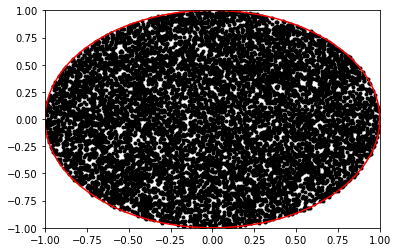

<Figure size 504x504 with 0 Axes>

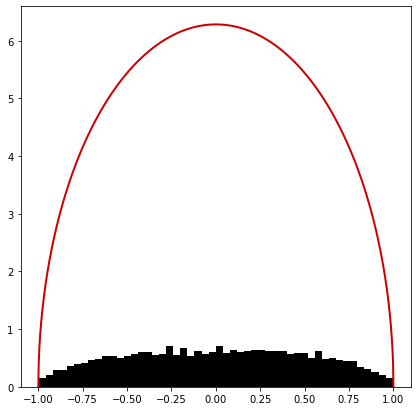

In [113]:
# sample uniformly within a circle
# example 2.6 on notes

# box-muller
n = 10000
r = np.random.uniform(0, 1, n)
theta = np.random.uniform(0, 2*np.pi, n)

x1 = np.sqrt(r) * np.cos(theta)
x2 = np.sqrt(r) * np.sin(theta)

# plotting the circle
def plot_circle(x1, x2):
    plt.plot(x1, x2, 'k.')# plot samples
    t = np.linspace(0, 2*np.pi, 1000) # dots for the circle (circumference = 2pi)
    plt.plot(np.cos(t), np.sin(t), 'r-') # plot the circle
    plt.xlim([-1, 1])
    plt.ylim([-1, 1])
    fig = plt.figure(figsize=(7, 7)) # plt.figure: set the figsize
    plt.show()

plot_circle(x1, x2)
    
def marginal(x):
    return (2*np.pi)*np.sqrt(1 - x**2)

xx = np.linspace(-1, 1, 1000)

fig, axs = plt.subplots(1, 1, figsize=(7, 7))
axs.hist(x1, bins=50, density=True, color='k', alpha=1)
axs.plot(xx, marginal(xx), color=[0.8, 0, 0], linewidth=2)
plt.show()

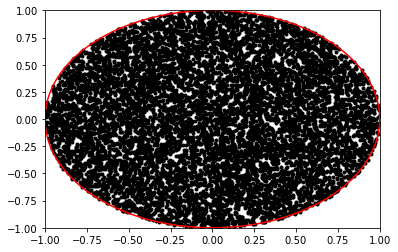

<Figure size 504x504 with 0 Axes>

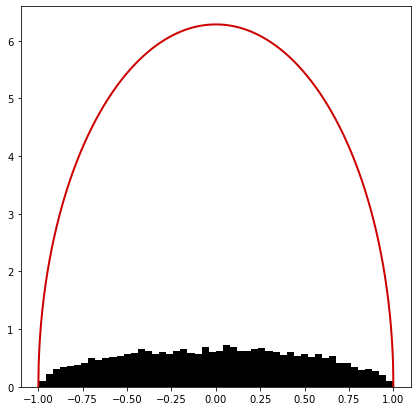

In [115]:
# ALT: sample and verify whether the coordinate is in the circle

n = 10000

# sample uniformly within a circle
def sample_circle (n):
    x_1 = np.zeros(n)
    x_2 = np.zeros(n)
    for i in range(n):
        while True:
            x_1[i] = np.random.uniform(-1, 1)
            x_2[i] = np.random.uniform(-1, 1)
            if x_1[i]**2 + x_2[i]**2 <= 1:
                break
    return x_1 , x_2

x1, x2 = sample_circle(n)